# Modeling Tumor Growth with Logistic and Reaction-Diffusion Equations 

## Theory Summary:

**Tumor growth can be modeled using a _reaction-diffusion equation_ with _logistic growth_, capturing both proliferation and spatial spreading.**

---

### **1. Logistic Growth**

- Describes how a population grows rapidly at first but slows as resources become limited.
- **Equation:**  
$$
\frac{\partial u}{\partial t} = r u \left(1 - \frac{u}{K}\right)
$$
  - \( u \): Tumor cell density
  - \( r \): Intrinsic (max) growth rate
  - \( K \): Carrying capacity (maximum density the environment can sustain)

- **Key Feature:** Growth slows down and stops as \( u \) approaches \( K \). The logistic equation captures this “self-limiting” behavior

---

### **2. Reaction-Diffusion Equation**

- Describes how cells both **react** (grow/divide) and **diffuse** (spread spatially).
general form:
  $$
  \frac{\partial u}{\partial t} = D \frac{\partial^2 u}{\partial x^2} + f(u)
 $$
  - \( D \): Diffusion coefficient (rate of spatial spread)
  - \( f(u) \): Reaction term (local population change)

- For tumor modeling, use logistic growth for \( f(u) \):
  $$
  \frac{\partial u}{\partial t} = D \frac{\partial^2 u}{\partial x^2} + r u \left(1 - \frac{u}{K}\right)
  $$

---

### **3. Why This Model?**

- **Logistic growth**: Tumors can't grow forever—crowding and resources limit size.
- **Diffusion**: Tumor cells migrate, invading surrounding tissue.
- **Reaction-diffusion together**: Models both the **expansion** and **spatial invasion** of tumors.

---

| Term        | Meaning                  | Tumor Interpretation         |
|-------------|--------------------------|-----------------------------|
| Logistic    | Growth with limits       | Slowed growth at high density |
| Diffusion   | Spreading in space       | Cell migration/invasion     |
| Reaction    | Local change (growth/death) | Cell division and death   |

---

**In summary:**  
_This model realistically describes how a tumor both grows (but not infinitely) and spreads through tissue, by combining the effects of local cell division and spatial migration._


In [64]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

### *Code Description:*  
**Simulates Tumor Cell Density:**  
The code represents the number of tumor cells at each position in a 1D tissue strip and 2D tumor growth, evolving over time.  

**Visualization:**  
It plots how the tumor density changes spatially over time and can animate the growth and spread.  



#### *So what we are seeing is a perfect, idealized tumor expanding like a drop of ink in water, based on math. But real tumors don’t grow like that, they involve Cell-level behavior,Random mutations, Uneven environment,	Cell-cell variability, Irregular shapes*

**so to tackle this later we can add noise or heterogeneity to the PDE model**  
tumor growth in 2D tissue using a reaction-diffusion model with added biological complexities like mutation, necrosis, anisotropic tissue, and noisy cellular behavior.

In [65]:
L = 10.0           
Nx = 200        
T = 10.0           
Nt = 1000          
D = 0.1             
r = 0.5             
K = 1.0           

# Discretization
x = np.linspace(0, L, Nx)
dx = x[1] - x[0]
dt = T / Nt

assert dt < dx**2 / (2*D), "Time step too large for numerical stability!"  # Stability condition check for explicit scheme

# Initial condition: small bump at center
u = np.zeros(Nx)  # Tissue starts empty — no tumor cells.
u[int(Nx/2)-5:int(Nx/2)+5] = 0.1
results = [u.copy()]     # Storage for plotting

# Time evolution
for n in range(Nt):
    u_new = u.copy()
    for i in range(1, Nx-1):
        diffusion = D * (u[i+1] - 2*u[i] + u[i-1]) / dx**2
        reaction = r * u[i] * (1 - u[i]/K)
        u_new[i] += dt * (diffusion + reaction)
    u = u_new
    if n % 50 == 0:
        results.append(u.copy())

L =  Length of spatial domain  
Nx =  Number of spatial points  
T = Total simulation time  
Nt =  Number of time steps  
D =  Diffusion coefficient  
r = Growth rate  
K = Carrying capacity  

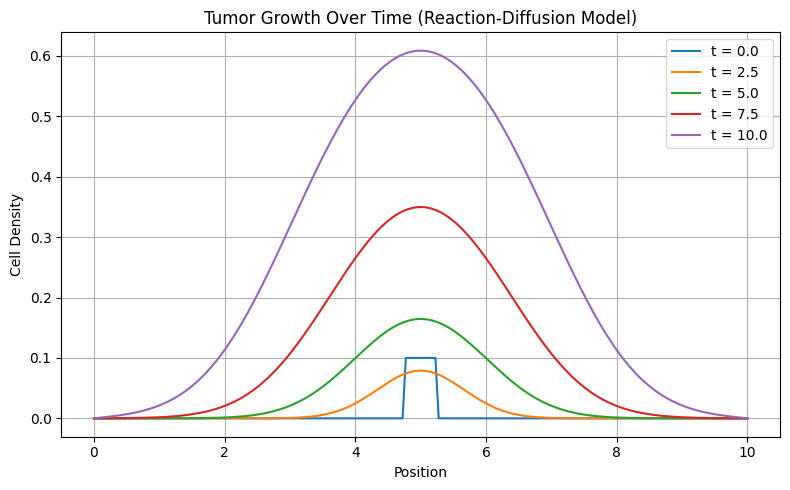

In [66]:
time_indices = [0, 5, 10, 15, 20]  # Corresponds to t = 0, 0.25T, 0.5T, 0.75T, T
time_values = [round(i * T / (Nt // 50), 2) for i in time_indices]  # Convert to actual time


plt.figure(figsize=(8, 5))
for idx, t_val in zip(time_indices, time_values):
    plt.plot(x, results[idx], label=f"t = {t_val}")

plt.xlabel("Position")      #  x axis is 1D strip of tissue 
plt.ylabel("Cell Density")    # and y is the number of tumor cells per unit length at each position
plt.title("Tumor Growth Over Time (Reaction-Diffusion Model)")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

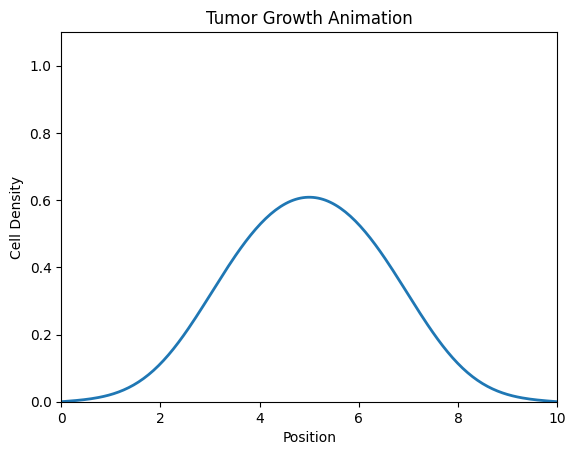

In [67]:
#animate evolution
fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2)
ax.set_xlim(0, L)
ax.set_ylim(0, 1.1)
ax.set_xlabel('Position')
ax.set_ylabel('Cell Density')
ax.set_title('Tumor Growth Animation')

def init():
    line.set_data([], [])
    return line,

def update(frame):
    line.set_data(x, results[frame])
    return line,

ani1 = FuncAnimation(fig, update, frames=len(results), init_func=init, blit=True)

HTML(ani1.to_jshtml())
#ani1.save('tumor_growth.gif', writer='pillow', fps=10)


# 2D reaction-diffusion tumor model (no noise added)

In [68]:
L = 100        # here its grid size (L x L)
T = 200        # time steps
D = 0.2        
r = 0.1        
K = 1.0        

# grid
u = np.zeros((L, L))
u[L//2-3:L//2+3, L//2-3:L//2+3] = 0.1  # initial tumor seed in center

results = []

# Finite difference 
for t in range(T):
    u_pad = np.pad(u, 1, mode='edge')  # pad for edge handling
    laplacian = (
        u_pad[2:, 1:-1] + u_pad[:-2, 1:-1] + 
        u_pad[1:-1, 2:] + u_pad[1:-1, :-2] - 4*u
    )
    diffusion = D * laplacian
    reaction = r * u * (1 - u/K)
    u += diffusion + reaction
    if t % 10 == 0:
        results.append(u.copy())


#fig, ax = plt.subplots()
#im = ax.imshow(results[0], cmap='hot', vmin=0, vmax=1.0)
#ax.set_title("2D Tumor Growth Simulation")

#def update(frame):
#    im.set_data(results[frame])
#    ax.set_title(f"Time step: {frame*10}")
#    return [im]

#anii = FuncAnimation(fig, update, frames=len(results), interval=100)
#HTML(anii.to_jshtml())
#anii.save('2dtumor_growth.gif', writer='pillow', fps=10)


Animation  : 2D Tumor Growth Simulation  
![2D Tumor Growth Simulation](./2dtumor_growth.gif)

## 2D reaction-diffusion tumor model (with noise added)

In [69]:
# Parameters
L = 100        
T = 250        
D = 0.2        
r= 0.1   
K = 1.0       
np.random.seed(42)  # For reproducibility we fix the random seed 

# Initialize tumor with a noisy center and zero elsewhere
u = np.zeros((L, L))  
center = L // 2
# Tumor is seeded in the center with noisy initial density — simulating irregular early growth.
u[center-3:center+3, center-3:center+3] = 0.5 + 0.3 * np.random.randn(6, 6) 
u = np.clip(u, 0, K)

# Create spatially varying diffusion coefficient (anisotropic)
# Tissue heterogeneity: Different parts of the tissue allow different levels of cell mobility.
D_map = 0.2 + 0.15 * np.random.rand(L, L)  # D varies across the tissue

results = []

# Simulation loop
for t in range(T):
    # Growth rate varies from point to point, mimicking genetic/epigenetic variability in tumor cells.
    r_noise = r + 0.1 * np.random.randn(L, L) 

    # Introduce mutation
    # Simulates a mutation that makes the top-right quadrant more aggressive.
    r_noise[center:, center:] *= 1.5

    # Laplacian using padding
    u_pad = np.pad(u, 1, mode='edge')
    laplacian = (          #Models diffusion: how cells move or spread into neighboring tissue.
        u_pad[2:, 1:-1] + u_pad[:-2, 1:-1] +
        u_pad[1:-1, 2:] + u_pad[1:-1, :-2] - 4*u
    )

    # Spatial diffusion and reaction terms
    diffusion = D_map * laplacian
    reaction = r_noise * u * (1 - u / K) # Logistic growth: cells multiply but slow down as space becomes crowded.

    # Simulate necrosis: slow growth in densely packed areas
    reaction[u > 0.9 * K] *= 0.2  # Necrosis or saturation: in very dense areas, growth slows due to lack of nutrients or oxygen.

    #  density
    u += diffusion + reaction # Total update: the tumor expands by both moving and dividing.
    u = np.clip(u, 0, K) # Enforces biological limits (e.g., no negative density or overgrowth).

    
    if t % 5 == 0: # this stores for animation every few steps
        results.append(u.copy())


#fig, ax = plt.subplots()
#im = ax.imshow(results[0], cmap='magma', vmin=0, vmax=1.0)
#fig.colorbar(im, ax=ax)
#ax.set_title("Tumor Growth Simulation")

#def update(frame):
#    im.set_data(results[frame])
#    ax.set_title(f"Time step: {frame * 5}")
 #   return [im]

#ani3 = FuncAnimation(fig, update, frames=len(results), interval=100)
#HTML(ani3.to_jshtml())
#ani3.save('2dtumor_growthnoisy2.gif', writer='pillow', fps=10)


##  Tumor Growth Simulation (2D Reaction-Diffusion Model)

This code simulates the spatial dynamics of tumor growth using a biologically inspired reaction-diffusion model with noise, mutation, and necrosis mechanisms.

###  Model Highlights
- **Reaction-Diffusion Equation**:
  
 $$
  \frac{\partial u(x, y, t)}{\partial t} = D(x, y) \nabla^2 u + r(x, y) \cdot u \left(1 - \frac{u}{K} \right)
  $$

- **Key Features**:
  - Noisy initial seeding and local growth rates
  - Spatially varying diffusion coefficient (tissue heterogeneity)
  - Mutation modeling in one quadrant (enhanced proliferation)
  - Necrosis in overcrowded regions
  - Animated simulation of tumor expansion

###  Biological Interpretations
- Tumor cells are seeded in the center of a tissue grid.
- They proliferate following logistic dynamics and diffuse spatially.
- Growth slows in dense regions (necrosis).
- A mutated region grows faster, simulating aggressive subclone expansion.
- Anisotropic tissue response is modeled via spatially varying diffusion.

###  Animation
![2D Tumor Growth Simulation](./2dtumor_growthnoisy2.gif)

> The simulation shows a growing tumor starting from a noisy seed with uneven edges and evolving into a complex, asymmetric structure influenced by mutations and tissue heterogeneity.
